# Time Series

Data yang akan dianalsis mengenai penjualan triwulanan untuk perusahaan kecil selama periode 1981–2005. Tidak hanya data penjulan, terdapat data AdBudget atau data anggaran iklan dan PDB atau data produk domestik bruto. Semua seri telah disesuaikan dengan inflasi. Dalam melakukan analisis kali ini hanya menggunakan data Sales, dikarenakan hanya ingin memprediksi variabel penjualan untuk tiga periode yang akan datang.

In [204]:
# Import the Package for Load the Data
import pandas as pd
import numpy as np

### Load Data

In [205]:
data = pd.read_excel('Exercise1.xlsx')
data.head()

,Sales,AdBudget,GDP
1981-03-01,1020.2,659.2,251.8
1981-06-01,889.2,589.0,290.9
1981-09-01,795.0,512.5,290.8
1981-12-01,1003.9,614.1,292.4
1982-03-01,1057.7,647.2,279.1


In [206]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 1981-03-01 to 2005-12-01
Data columns (total 3 columns):
Sales       100 non-null float64
AdBudget    100 non-null float64
GDP         100 non-null float64
dtypes: float64(3)
memory usage: 3.1 KB


Berdasarkan info data, dapat diketahui data masih teridri dari tiga variabel. Sehingga perlu dilakukan penghapusan variabel sesuai dengan variabel yang akan dianalsis.

In [207]:
data = data.drop(['AdBudget', 'GDP'],axis=1)
data.head()

,Sales
1981-03-01,1020.2
1981-06-01,889.2
1981-09-01,795.0
1981-12-01,1003.9
1982-03-01,1057.7


In [208]:
data.tail()

,Sales
2004-12-01,1018.7
2005-03-01,1112.5
2005-06-01,997.4
2005-09-01,826.8
2005-12-01,992.6


Dapat diketahui data yang tersedia merupakan data penjualan dari tanggal 1 Maret 1981 s.d 1 Desember 2005 setiap tiga bulan sekali. Pola data dapat dilihat berdasarkan *Time Series Plot* sebagai berikut.

### Visualization

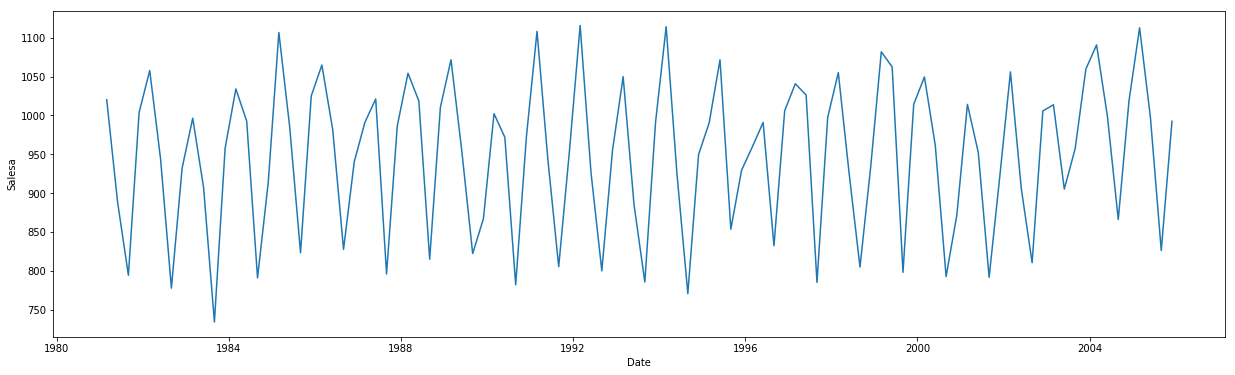

In [209]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = (21, 6)

# Plot Graph
plt.xlabel('Date')
plt.ylabel('Salesa')
plt.plot(data['Sales'])

*Time Series Plot* di atas menunjukkan variabel Sales yang realatif sama di setiap triwulannya selama 24 tahun. Namun jika penjualan dilihat berdasarkan setiap triwulanya, maka dapat dilihat melalui Box Plot berikut.

In [210]:
data1 = data
data1.reset_index(inplace=True)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
index    100 non-null datetime64[ns]
Sales    100 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.6 KB


In [211]:
data1['month'] = data1['index'].dt.month
data1[['index','month']].head()

,index,month
0,1981-03-01,3
1,1981-06-01,6
2,1981-09-01,9
3,1981-12-01,12
4,1982-03-01,3


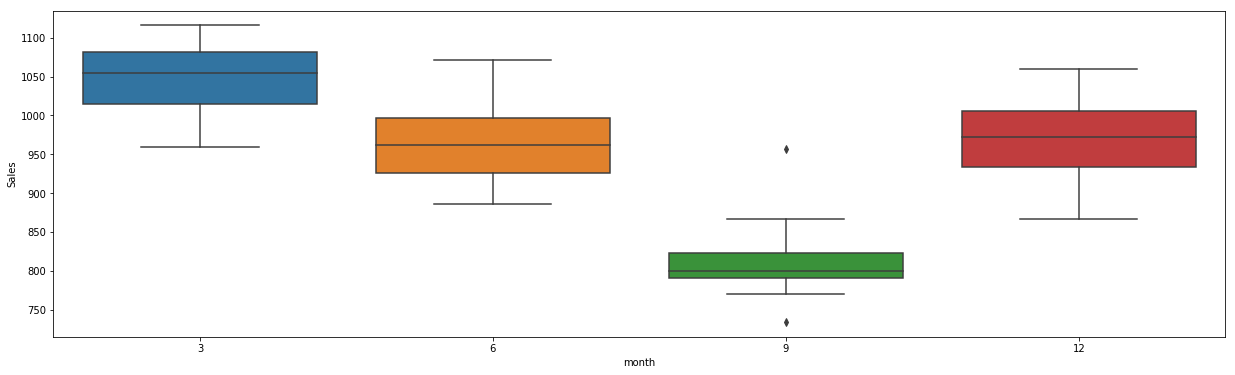

In [212]:
import seaborn as sns
sns.boxplot( x=data1["month"], y=data1["Sales"] )

Berdasarkan Box Plot, dapat diketahui adanya perbedaan tingkat penjualan disetiap triwulannya. Pada triwulan di bulan 3 atau Bulan Maret menunjukkan penjualan yang relatif tinggi jika dibandingan dengan ketiga bulan lainnya. Sedangkan pada bulan ke 9 atau Bulan September menunjukkan penjualan yang relatif rendah dalam kurun waktu 24 tahun tersebut. Sedangkan pada bulan ke 6 dan 12 atau Bulan Juni dan Bulan Desember menunjukkan penjualan yang relatif sama. Maka berdasarkan Box Plot ini juga dapat dilakukan peninjauan untuk ke-empat bulan tersebut, mengetahui sebab-sebab apa saja yang mempengaruhi penjualan di setiap triwulannya. 

### Check the Stasionarity

In [213]:
data = pd.read_excel('Exercise1.xlsx')
data = data.drop(['AdBudget', 'GDP'],axis=1)

In [214]:
# Determining rolling statistics
rolmean = data.rolling (window = 12).mean()
rolstd = data.rolling(window = 12).std()
print(rolmean, rolstd)

                 Sales
1981-03-01         NaN
1981-06-01         NaN
1981-09-01         NaN
1981-12-01         NaN
1982-03-01         NaN
1982-06-01         NaN
1982-09-01         NaN
1982-12-01         NaN
1983-03-01         NaN
1983-06-01         NaN
1983-09-01         NaN
1983-12-01  918.233333
1984-03-01  919.391667
1984-06-01  928.025000
1984-09-01  927.750000
1984-12-01  920.275000
1985-03-01  924.341667
1985-06-01  927.733333
1985-09-01  931.516667
1985-12-01  939.233333
1986-03-01  944.916667
1986-06-01  951.100000
1986-09-01  958.866667
1986-12-01  957.416667
1987-03-01  953.833333
1987-06-01  956.200000
1987-09-01  956.616667
1987-12-01  962.650000
1988-03-01  958.291667
1988-06-01  961.091667
...                ...
1998-09-01  946.350000
1998-12-01  946.708333
1999-03-01  956.883333
1999-06-01  962.816667
1999-09-01  959.975000
1999-12-01  960.658333
2000-03-01  961.391667
2000-06-01  956.008333
2000-09-01  956.633333
2000-12-01  946.191667
2001-03-01  942.791667
2001-06-01 

In [215]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(data):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(data, window=12)
    rolstd = pd.rolling_std(data, window=12)
#Plot rolling statistics:
    plt.plot(data, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
#Perform Dickey-Fuller test:
    print( 'Results of Dickey-Fuller Test:')
    dftest = adfuller(data, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

C:\Users\afifah064126\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\afifah064126\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


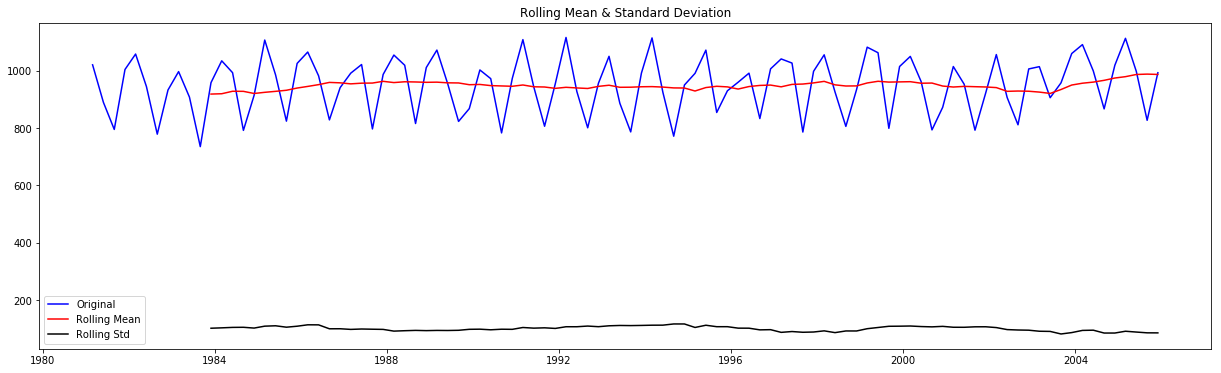

Results of Dickey-Fuller Test:
Test Statistic                 -3.262755
p-value                         0.016628
#Lags Used                      9.000000
Number of Observations Used    90.000000
Critical Value (1%)            -3.505190
Critical Value (5%)            -2.894232
Critical Value (10%)           -2.584210
dtype: float64


In [216]:
test_stationarity(data['Sales'])

Berdasarkan plot, dapat diketahui bahwa Rolling Mean terlihat mendekati data sedangkan Rolling Std terlihat berada jauh dari dta. Maka terindikasikan data hanya stasioner pada mean atau rata-rata. Dan berdasarkan Dickey-Fuller test, maka dapat diketahui bahwa :

**Uji Hipotesis :** 
- H0 : Data Tidak Stationer 
- H1 : Data Stationer
**Statistik Uji :**
- Nilai Dickey-Fuller test menunjukkan -3,2 atau p-value = 0,016
**Keputusan dan Kesimpulan :** 
- Berdasarkan nilai p-value maka dapat diketahu nilai <0,05 maka dapat dikatakan tolak H0. Sehingga dapat disimpulkan bahawa data penjualan merupakan data yang stasioner.
<br>
<br>
Langkah selanjutnya yang dapat dilakukan yaitu dengan melakukan pengecekan pada ACF dan PACF sebagai berikut.
****

### ACF dan PACF

In [217]:
from pandas import read_csv
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

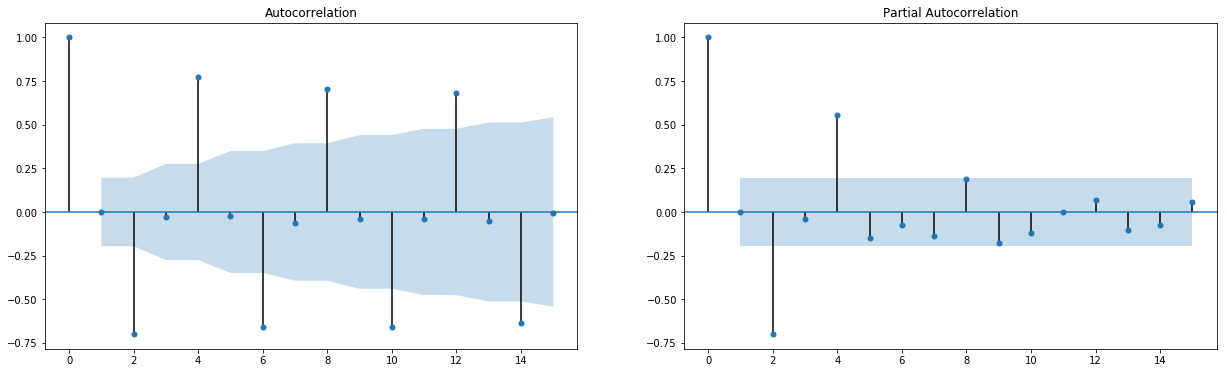

In [218]:
pyplot.figure()
pyplot.subplot(121)
plot_acf(data, ax=pyplot.gca(), lags = 15)
pyplot.subplot(122)
plot_pacf(data, ax=pyplot.gca(), lags = 15)
pyplot.show()

Berdasarkan ACF maka dapat terindikasi pola data Sales memiliki pola seasonal setiap 2 periode (6 bulan). Hal ini dikarenakan lag pada **ACF** terlihat *tails off* atau turun secara perlahan. Berdasarkan **PACF** maka terindikasi adanya unsur AR dikarenakan lag 4 keluar dari batas. Maka model terindikasi sebagai berikut
<br>
AR = 4
<br>
MA = 0
<br>
ARIMA(p,d,q) = ARIMA (4,0,0) 

Lambda: 2.669358


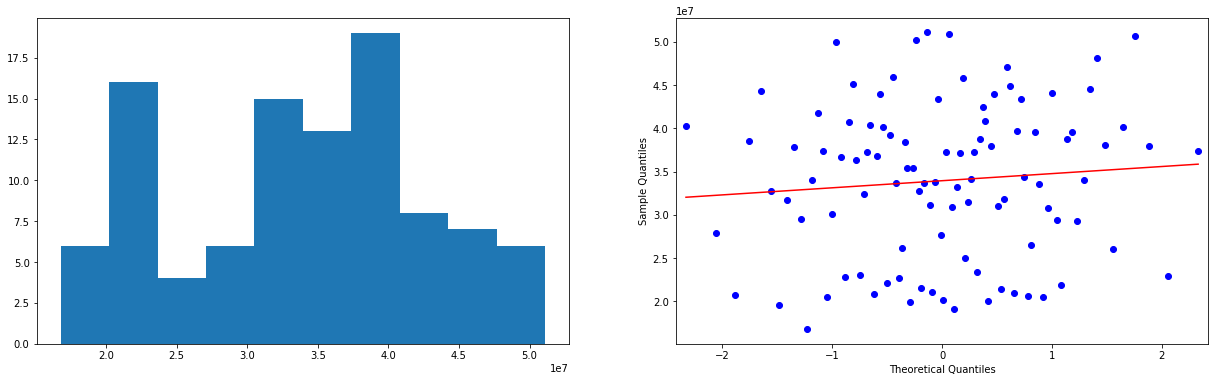

In [219]:
from pandas import read_csv
from pandas import DataFrame
from scipy.stats import boxcox
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot

X = data.values
transformed, lam = boxcox(X)
print('Lambda: %f' % lam)
pyplot.figure(1)
# histogram
pyplot.subplot(121)
pyplot.hist(transformed)
# q-q plot
pyplot.subplot(122)
qqplot(transformed, line='r', ax=pyplot.gca())
pyplot.show()

## ARIMA (4,0,0)

In [220]:
from statsmodels.tsa.arima_model import ARIMA

# 4,0,0 ARIMA Model
model = ARIMA(data, order=(4,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\afifah064126\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  100
Model:                     ARMA(4, 0)   Log Likelihood                -543.024
Method:                       css-mle   S.D. of innovations             54.311
Date:                Fri, 06 Sep 2019   AIC                           1098.048
Time:                        05:52:06   BIC                           1113.679
Sample:                    03-01-1981   HQIC                          1104.374
                         - 12-01-2005                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         949.4899      7.980    118.978      0.000     933.849     965.131
ar.L1.Sales     0.0164      0.078      0.208      0.835      -0.137       0.170
ar.L2.Sales    -0.2741      0.076     -3.584    

C:\Users\afifah064126\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


C:\Users\afifah064126\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


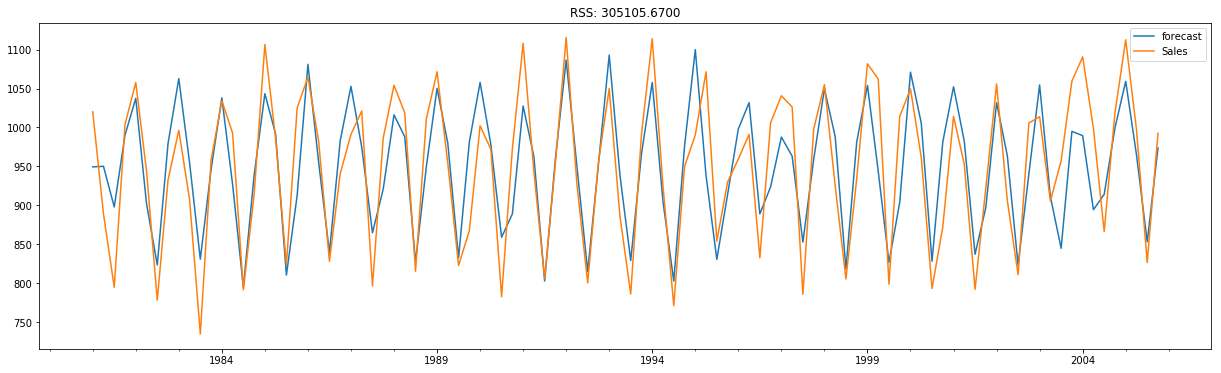

In [221]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.title('RSS: %.4f'% sum((model_fit.fittedvalues-data['Sales'])**2))
plt.show()

In [222]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'MAPE':mape, 'ME':me, 'MAE': mae, 
            'MPE': mpe, 'RMSE':rmse})

forecast_accuracy(model_fit.fittedvalues, data['Sales'])

{'MAE': 45.318408648576316,
 'MAPE': 0.04785676998500506,
 'ME': -0.5736970942665756,
 'MPE': 0.0029926955865763345,
 'RMSE': 55.236371173184985}

Nilai akurasi pada model menunjukkan nilai kebaikan pada model, semakin kecil nilai akurasi maka dapat dikatakan kesalahan model dalam memprediksi semakin kecil. Berfokus pada nilai **MAPE**, maka dapat dikatakan dengan nilai MAPE = 0.04 menunjukkan kesalahan untuk memprediksi nilai pada periode selanjutnya yaitu 0,04%.

### Predict Plot

setelah mendapatan model, maka dapat dilakukan prediksi berdasarkan model yang telah diperoleh. Dengan menggunakan model ARIMA(4,0,0) atau AR(4) maka dapat diperoleh plot prediksi untuk beberapa triwulan sebagai berikut.

C:\Users\afifah064126\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


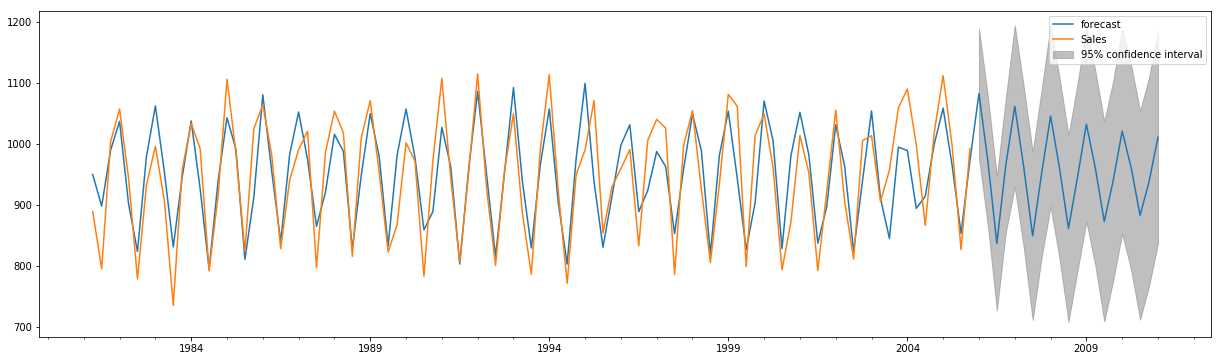

In [223]:
model_fit.plot_predict(1,120)
x=model_fit.forecast(steps=120)

Untuk mengetahui apakah model yang telah diperoleh sudah cukup baik untuk digunakan ataupun tidak, maka dapat dilakukan pemodelan lainnya agar dapat dibandingkan dengan model yang telah ada. Dikarenakan pada plot ACF menunjukkan adanya indikasi musiman setiap 2 triwulan, maka dari itu dilakukan pemodelan dengan cara yang sama dengan sebelumnya dengan menggantikan nilai MA-nya. Berikut analisis lebih lanjut mengenai model ARIMA(4,0,2) atau ARMA(4,2).

## ARIMA (4,0,2)

In [224]:
from statsmodels.tsa.arima_model import ARIMA

# 4,0,2 ARIMA Model
model1 = ARIMA(data, order=(4,0,2))
model_fit1 = model.fit(disp=0)
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'MAPE':mape, 'ME':me, 'MAE': mae, 
            'MPE': mpe, 'RMSE':rmse})

forecast_accuracy(model_fit1.fittedvalues, data['Sales'])

C:\Users\afifah064126\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\afifah064126\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\afifah064126\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtyp

{'MAE': 45.318408648576316,
 'MAPE': 0.04785676998500506,
 'ME': -0.5736970942665756,
 'MPE': 0.0029926955865763345,
 'RMSE': 55.236371173184985}

Jika dilihat berdasarkan akurasi, maka dapat diketahui nilai akurasi pada model ARIMA(4,0,2) lebih baik jika dibandingkan dengan model ARIMA(4,0,0). 
<br>
<br>
Dan dikarenakan adanya unsur musim pada data, maka diduga metode SARIMA akan lebih baik dalam memodelkan data penjualan. Berikut perhitungan yang dilakukan dalam melakukan analisis SARIMA.

### SARIMA

Model SARIMA adalah model deret waktu umum, dan digunakan untuk menganalisis dan memperkirakan data yang memiliki komponen musiman tambahan. Kami memperoleh nilai untuk p, d, dan q untuk membuat seri waktu tetap. Serangkaian stasioner memiliki mean dan varian konstan. <br>
Notasi model adalah SARIMA (p, d, q). (P, D, Q) m. Tiga parameter ini menjelaskan musiman, tren, dan noise dalam data

In [225]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(endog=data.values,
                                order=(4, 0, 0),
                                seasonal_order=(0, 1, 1, 2),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

In [226]:
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1638      0.107      1.537      0.124      -0.045       0.373
ar.L2         -0.4245      0.112     -3.774      0.000      -0.645      -0.204
ar.L3          0.1315      0.101      1.298      0.194      -0.067       0.330
ar.L4          0.4677      0.100      4.662      0.000       0.271       0.664
ma.S.L2       -1.0000      0.157     -6.382      0.000      -1.307      -0.693
sigma2      2757.0684   5.68e-05   4.85e+07      0.000    2757.068    2757.068


In [227]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'MAPE':mape, 'ME':me, 'MAE': mae, 
            'MPE': mpe, 'RMSE':rmse})

forecast_accuracy(results.fittedvalues, data['Sales'])

{'MAE': 66.75506613044348,
 'MAPE': 0.0696435459864828,
 'ME': -20.28855637441536,
 'MPE': -0.018210120089101677,
 'RMSE': 145.46457069735266}

Berdasarkan nilai akurasi menunjukkan nilai akurasi yang lebih tinggi untuk setiap perhitungan jika dibandingkan dengan kedua model ARIMA sebelumnya.

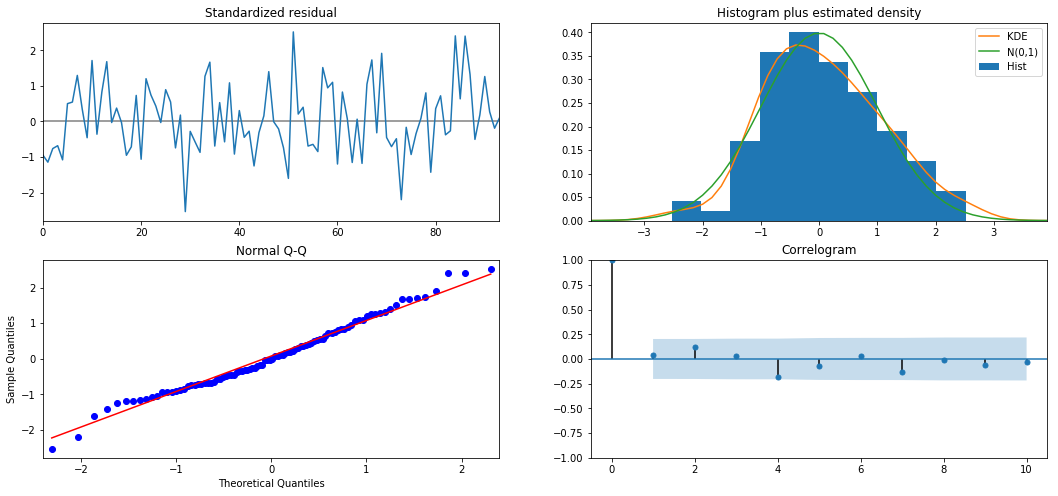

In [228]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

Berdasarkan Plot Diagnostic pada model SARIMA di atas, dapat diketahui model juga sudah cukup baik dikarenakan pada ke-empat plot telah memenuhi asumsi IIDN.

## RESULT
Berdasarkan hasil analisis maka dapat diketahui bahwa model terbaik dalam memprediksi hasil penjualan yaitu dengan menggunakan model ARMA(4,2). Dari hasil prediksi harapannya dapat memberikan informasi ataupun antisipasi pada saat predikasi penjualan telah diketahui. Jika pada hasil prediksi menunjukkan hasil yang menurun maupun meningkat, maka perusahaan dapat melakukan optimisasi agar mendapatkan profit yang optimal. Berkit hasil plot prediksi berdasarkan model terbaik yang telah diperoleh.

C:\Users\afifah064126\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


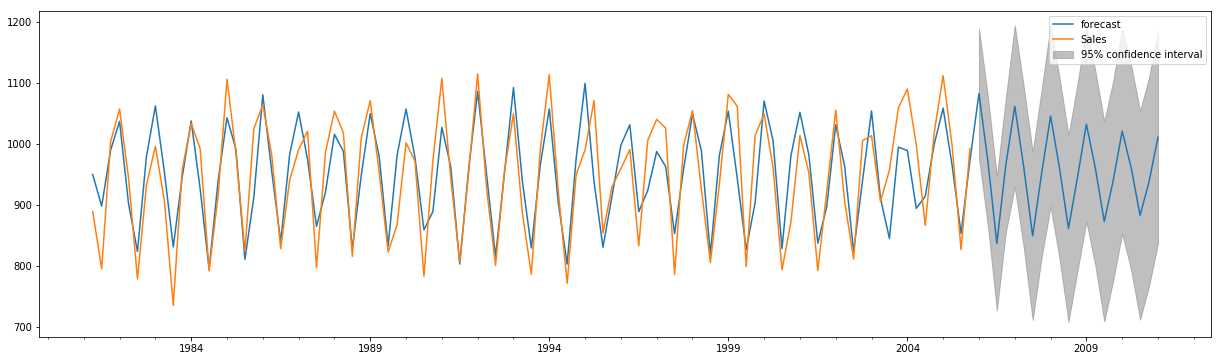

In [229]:
model_fit1.plot_predict(1,120)
x=model_fit1.forecast(steps=120)